In [6]:
#load libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [8]:
#load dataset
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [10]:
#normalize
x_train= x_train/255
x_test= x_test/255

In [12]:
#reshape
x_train= x_train.reshape(-1,28,28,1)
x_test= x_test.reshape(-1,28,28,1)


In [14]:
#one-hot encoding
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [18]:
#build
model= Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
    
    

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [22]:
#train
history= model.fit(
    x_train,y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.8522 - loss: 0.5065 - val_accuracy: 0.9780 - val_loss: 0.0724
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9791 - loss: 0.0653 - val_accuracy: 0.9857 - val_loss: 0.0502
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9883 - val_loss: 0.0412
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9893 - val_loss: 0.0386
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.9893 - val_loss: 0.0359


In [24]:
#evaluate
loss,acc= model.evaluate(x_test,y_test)
print(f"Test Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9897 - loss: 0.0321
Test Accuracy: 0.9916


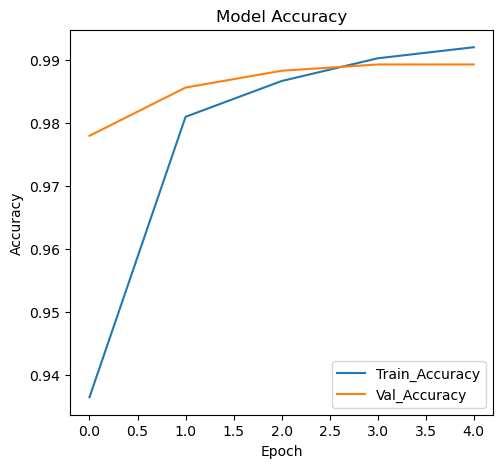

In [26]:
#visualize
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train_Accuracy")
plt.plot(history.history['val_accuracy'], label="Val_Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

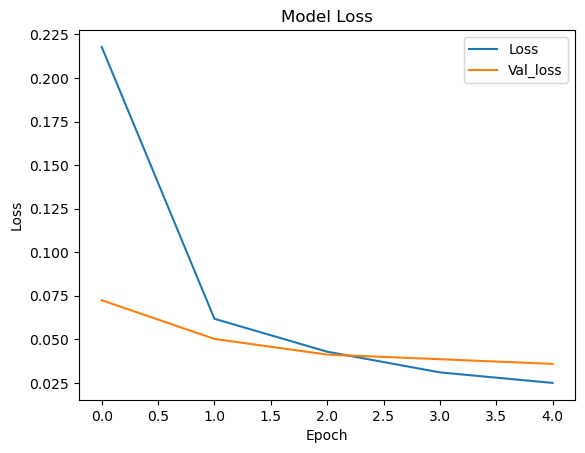

In [28]:
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Val_loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()